In [1]:
# pytorch LSTM for regression
import numpy as np
from numpy import vstack
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from torch import Tensor
from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Module
from torch.nn.init import kaiming_uniform_
from sklearn.preprocessing import minmax_scale
from torch.nn.utils.rnn import pack_sequence
import torch
import gensim
torch.manual_seed(3)
from Data_Utils import *
from Plot_Utils import *
from Math_Utils import *
torch.autograd.set_detect_anomaly(True)
#LSTM(sequence_len,batchsize,dim)

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


class RNN(nn.Module):
    """for rnn"""
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,)
        self.output_layer = nn.Linear(in_features=hidden_size, out_features=output_size)

    def forward(self, x, h_state):
        rnn_out, h_state = self.rnn(x, h_state) 
        out = []
        for time in range(rnn_out.size(1)):
            every_time_out = rnn_out[:, time, :]       
            out.append(self.output_layer(every_time_out))
        return torch.stack(out, dim=1), h_state       # torch.stack expansion to [1, output_size, 1]


C:\Anaconda\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [1]:
import numpy as np
from numpy import vstack
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from torch import Tensor
from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Module
from torch.nn.init import kaiming_uniform_
from sklearn.preprocessing import minmax_scale
from torch.nn.utils.rnn import pack_sequence
import torch
import gensim
torch.manual_seed(3)
from Data_Utils import *
from Plot_Utils import *
from Math_Utils import *
torch.autograd.set_detect_anomaly(True)
#LSTM(sequence_len,batchsize,dim)

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class RNN(Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNN, self).__init__()
        self.num_layers=num_layers
        self.rnn = torch.nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,)
        self.hidden_layer = Linear(in_features=hidden_size, out_features=output_size*8)
        torch.nn.LayerNorm(normalized_shape, eps=1e-05, elementwise_affine=True)
        self.act=ReLU()
        self.output_layer = Linear(in_features=output_size*8, out_features=output_size)


    def simple_batch_norm_1d(self,x, gamma, beta):
        eps = 1e-5
        x_mean = torch.mean(x, dim=0, keepdim=True)  # 保留维度进行 broadcast
        x_var = torch.mean((x - x_mean) ** 2, dim=0, keepdim=True)
        x_hat = (x - x_mean) / torch.sqrt(x_var + eps)
        return gamma.view_as(x_mean) * x_hat + beta.view_as(x_mean)


    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # rnn_out (batch, time_step, hidden_size)

        #    if torch.norm(self.rnn.weight_hh_l[i])>1:
        #        self.rnn.weight_hh_l[i]=torch.div(self.rnn.weight_hh_l[i],torch.norm(self.rnn.weight_hh_l[i]))
         #       print(self.rnn.weight_hh_l[i])
        #        gamma = torch.ones(m.weight.data.shape[1])
        #        beta = torch.zeros(m.weight.data.shape[1])
        #        m.weight.data = self.simple_batch_norm_1d(m.weight.data, gamma, beta)
                #print(torch.norm(m.weight.data))
                #m.weight.data.normal_(0, 1)
        #    elif isinstance(m, nn.BatchNorm3d):
        #        m.weight.data.fill_(1)
        rnn_out, h_state = self.rnn(x, h_state)   # h_state是之前的隐层状态
        #h_state=LayerNorm(3,h_state, 1e-05,  True)
        out = []
            #print(idx,self.rnn._flat_weights[idx])
        for time in range(rnn_out.size(1)):
            every_time_out = rnn_out[:, time, :]       # 相当于获取每个时间点上的输出，然后过输出层
            out0=self.hidden_layer(every_time_out)
            out1=self.act(out0)
            out.append(self.output_layer(out1))
        return torch.stack(out, dim=1), h_state       # torch.stack扩成[1, output_size, 1]

C:\Anaconda\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [20]:
    from LCattention.lcrnn_model import LCrnn,RNN
    from Data_Utils import *
    from Plot_Utils import *
    from Math_Utils import *
    def load_model(save_path):
        model = torch.load(save_path)
        return model
    steps,gap=200,10   
    data_path='../SNCRL_Dataset/CellCycle/'
    DS=Dataset(data_path,1)
    LC=LCrnn(DS,steps,gap)
    save_path='../SCNRL_Master/baseline/lcrnn_model_4.pkl'
    model = load_model(save_path)
    for name, param in model.named_parameters():
        print(name,param.shape)
    print('OK')
    for name in model.state_dict():
        print(name)
        print(model.state_dict()[name].shape)
    print('OKL')


successly load time
(1400000, 44) (600000, 44) (100000, 44)
self.train_dl (1400000, 44)
rnn.weight_ih_l0 torch.Size([132, 44])
rnn.weight_hh_l0 torch.Size([132, 132])
rnn.bias_ih_l0 torch.Size([132])
rnn.bias_hh_l0 torch.Size([132])
rnn.weight_ih_l1 torch.Size([132, 132])
rnn.weight_hh_l1 torch.Size([132, 132])
rnn.bias_ih_l1 torch.Size([132])
rnn.bias_hh_l1 torch.Size([132])
rnn.weight_ih_l2 torch.Size([132, 132])
rnn.weight_hh_l2 torch.Size([132, 132])
rnn.bias_ih_l2 torch.Size([132])
rnn.bias_hh_l2 torch.Size([132])
hidden_layer.weight torch.Size([352, 132])
hidden_layer.bias torch.Size([352])
output_layer.weight torch.Size([44, 352])
output_layer.bias torch.Size([44])
OK
rnn.weight_ih_l0
torch.Size([132, 44])
rnn.weight_hh_l0
torch.Size([132, 132])
rnn.bias_ih_l0
torch.Size([132])
rnn.bias_hh_l0
torch.Size([132])
rnn.weight_ih_l1
torch.Size([132, 132])
rnn.weight_hh_l1
torch.Size([132, 132])
rnn.bias_ih_l1
torch.Size([132])
rnn.bias_hh_l1
torch.Size([132])
rnn.weight_ih_l2
torch.Si

In [21]:
        LC=LCrnn(DS,steps,gap)
        time=DS.time[0:len(DS.time):gap].reshape(-1,1)
        print(len(time))
        ori_data=DS.ori_data
        #ori_data=DS.transform_back(DS.ori_data,'ori2train')
        #plt.show()
        x_0=DS.ori_data[0,:]
        path_all = []
        h_state=None
        yhat=DS.ori_data[200:200+gap,:]
        for i in range(len(time)):
            x_0 = yhat
            #x_0 = DS.ori_data[i+200:i+200+gap,:]
            x_t=torch.from_numpy(x_0.reshape(-1,gap,DS.dim))
            yhat,h_state = model(x_t, h_state)
            h_state = h_state.detach()
            yhat = yhat.detach().numpy()
            yhat=yhat.reshape(-1,DS.dim)
            #print('x_0 shape is',x_0.shape)
            #jacobian(torch.from_numpy(x_0),torch.from_numpy(yhat),gap)
            #path_all.append(list(self.Dataset.transform_back(yhat[0],'train2back')))
            path_all.append(yhat[0])
        print('OKL')


1000
OKL


0


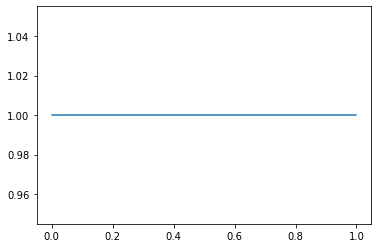

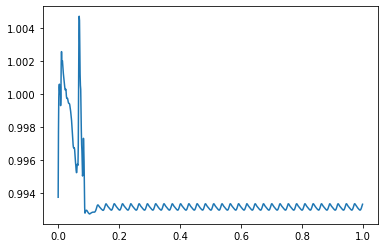

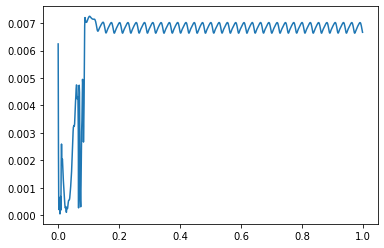

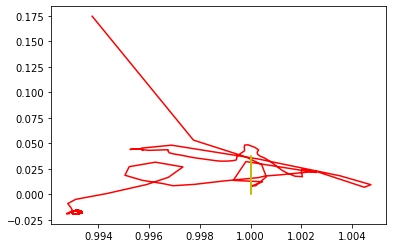

1


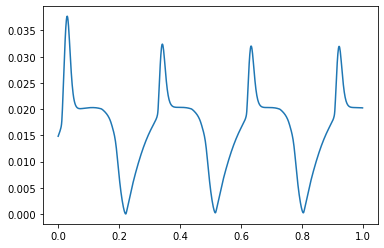

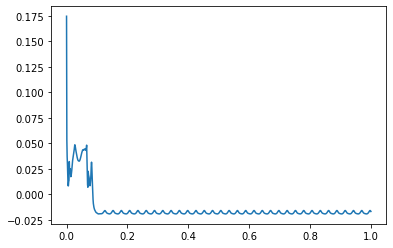

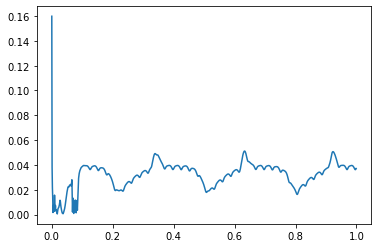

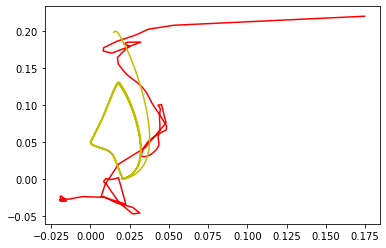

2


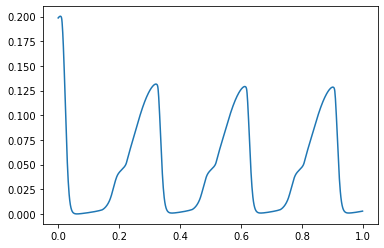

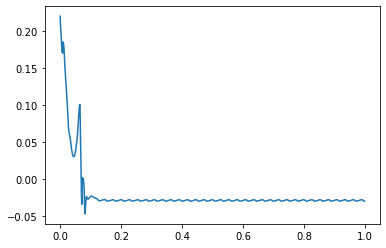

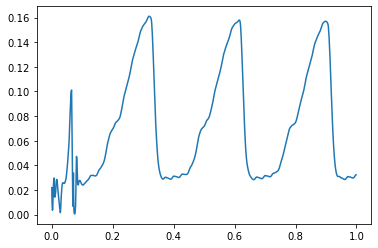

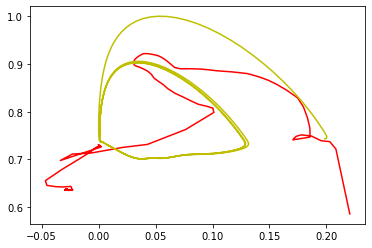

3


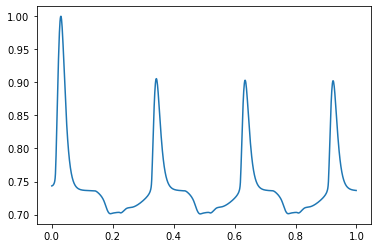

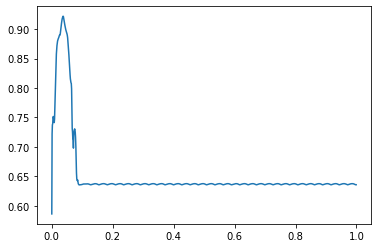

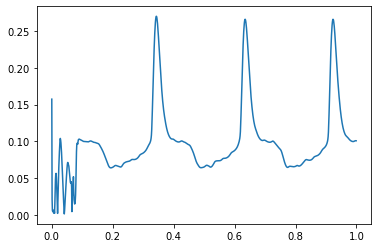

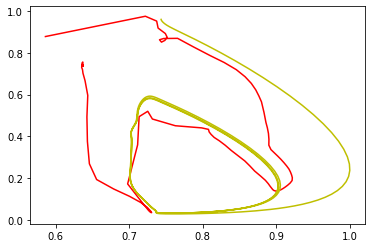

4


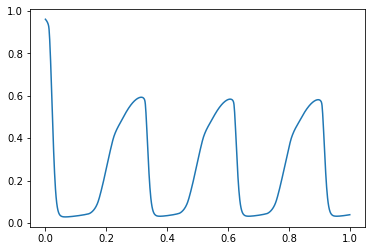

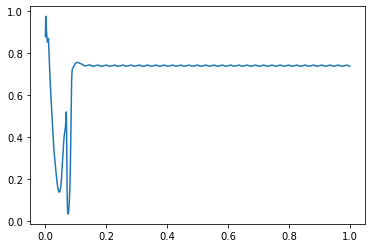

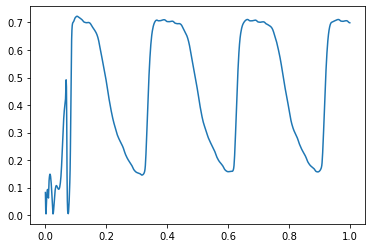

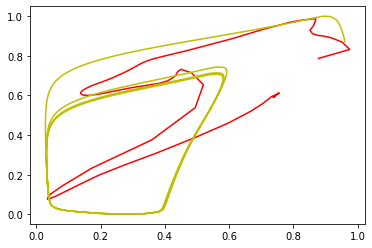

5


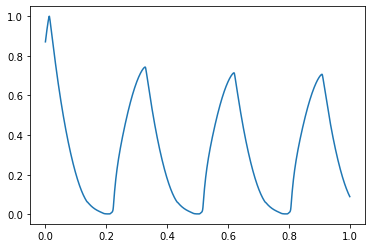

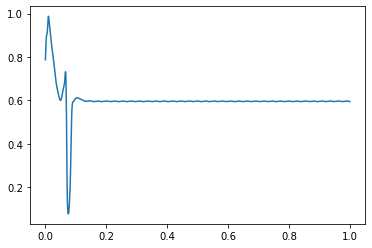

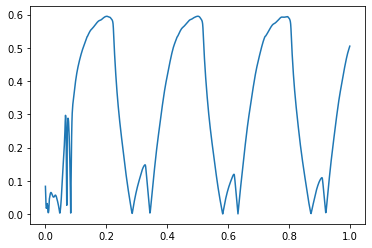

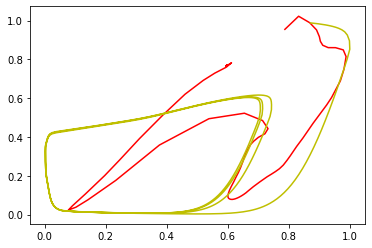

6


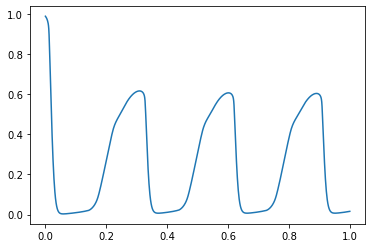

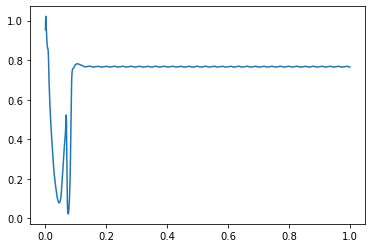

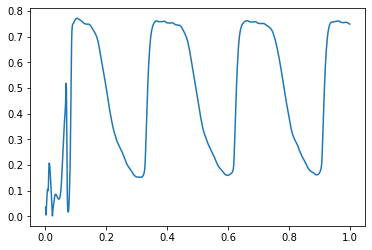

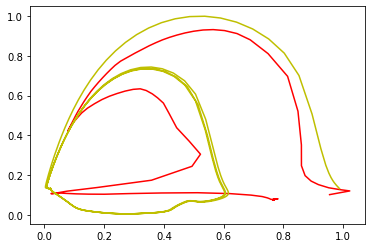

7


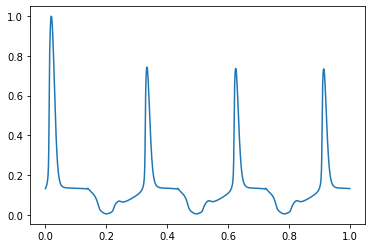

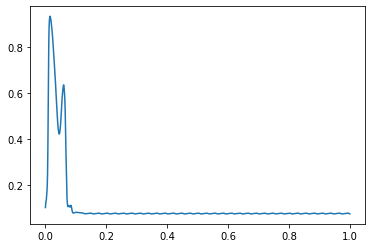

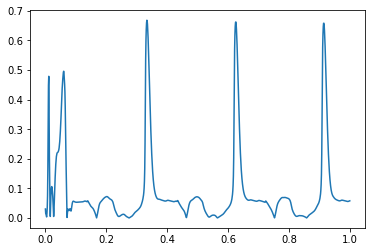

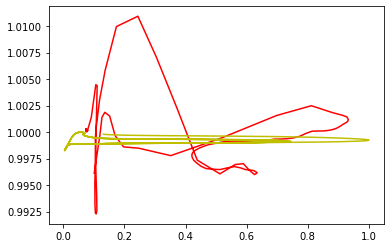

8


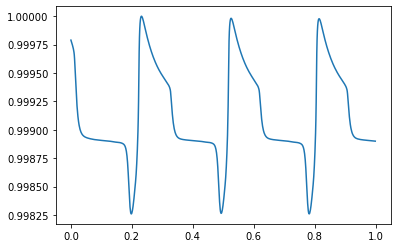

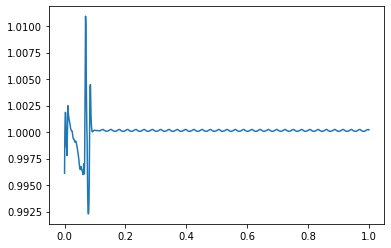

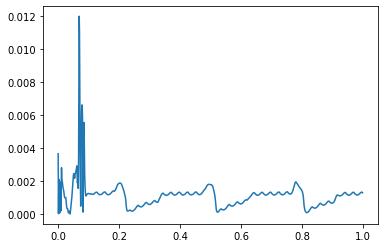

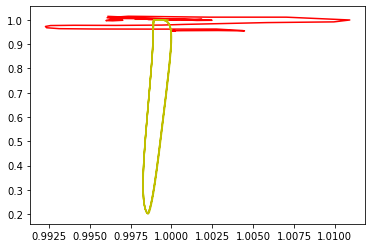

9


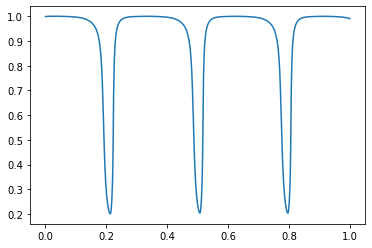

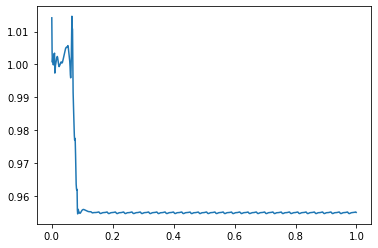

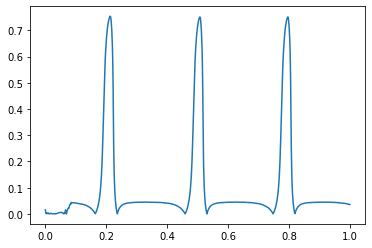

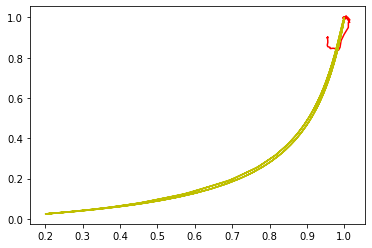

10


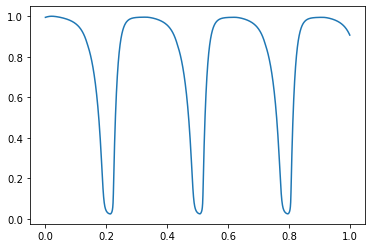

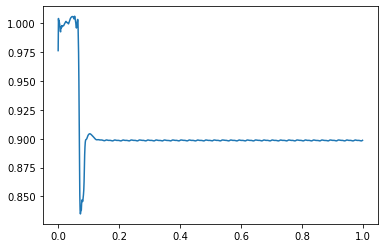

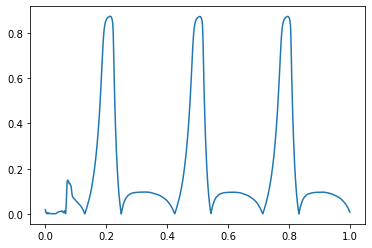

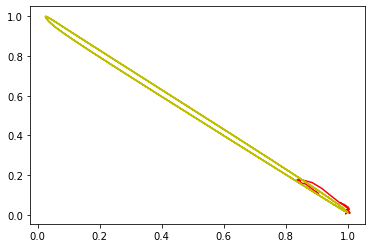

11


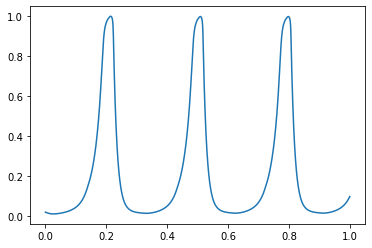

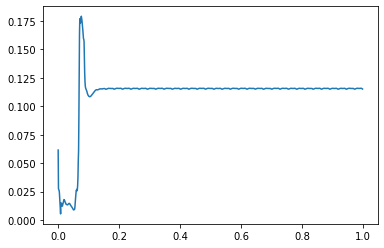

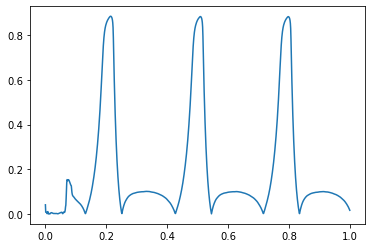

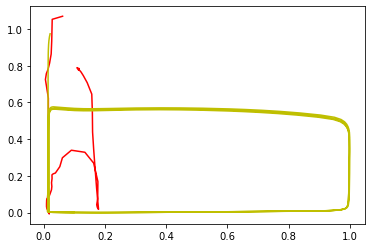

12


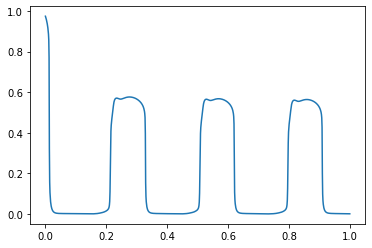

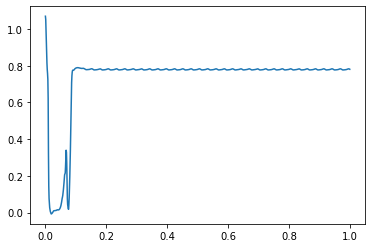

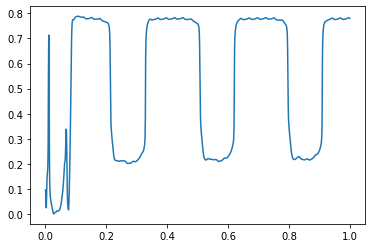

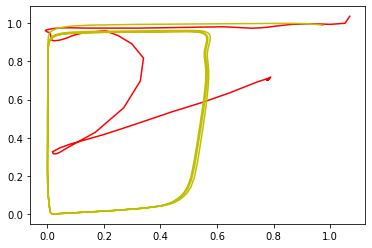

13


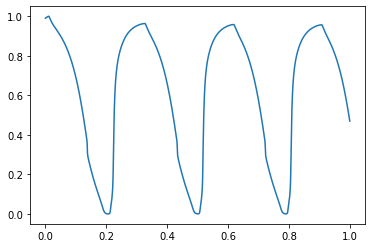

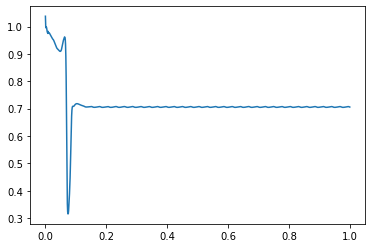

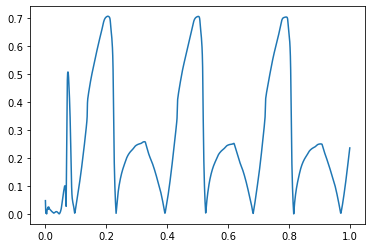

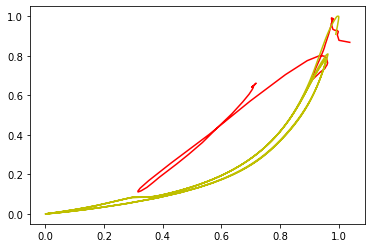

14


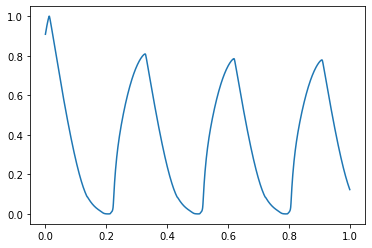

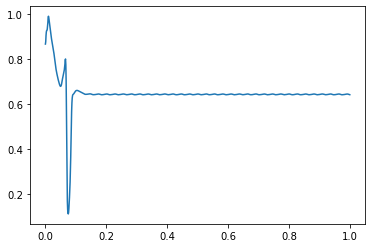

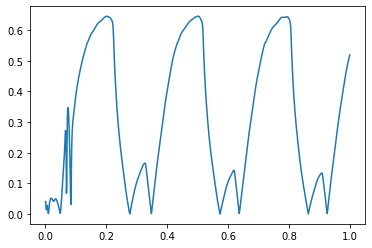

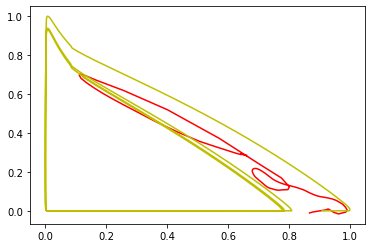

15


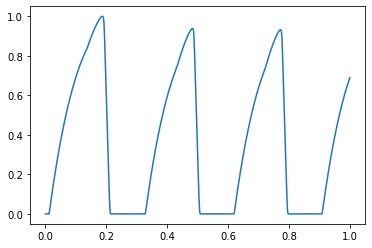

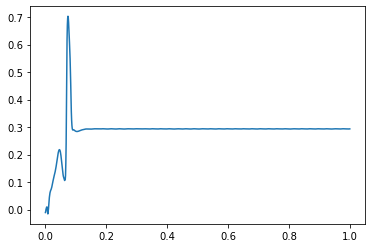

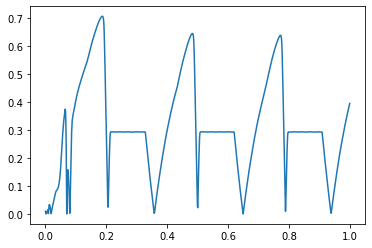

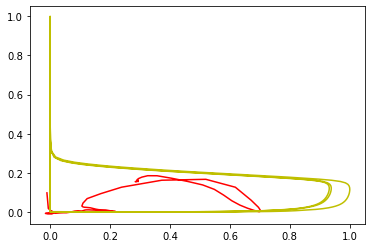

16


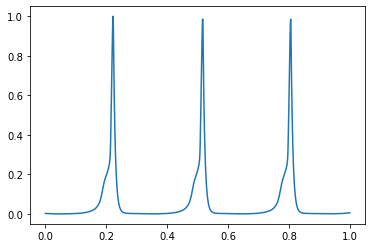

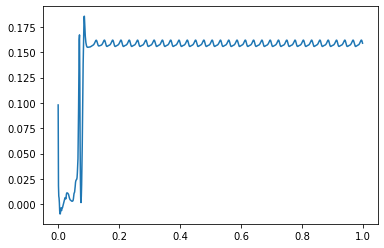

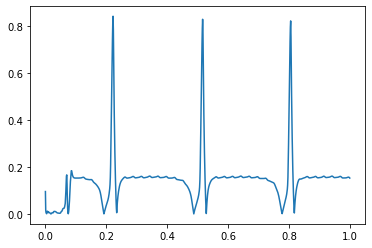

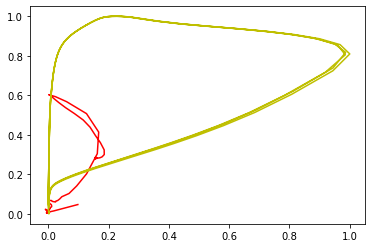

17


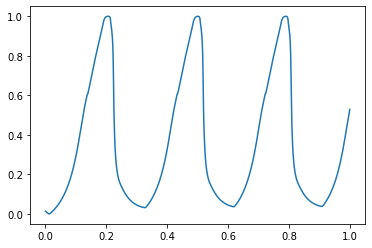

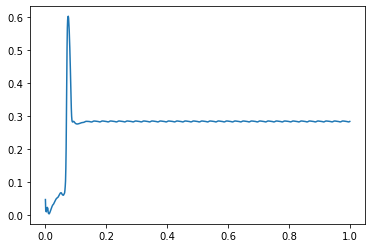

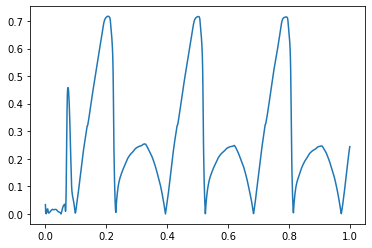

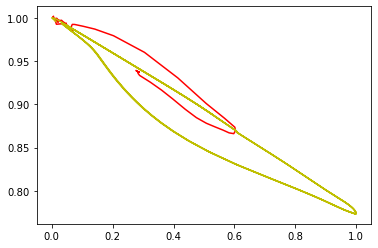

18


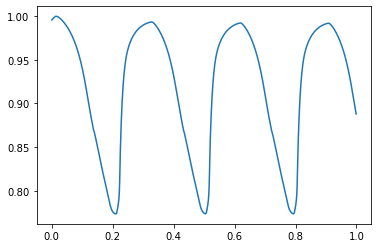

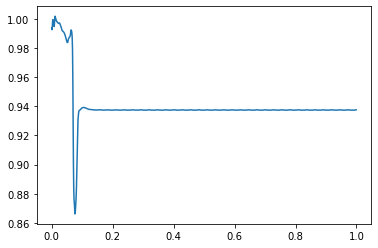

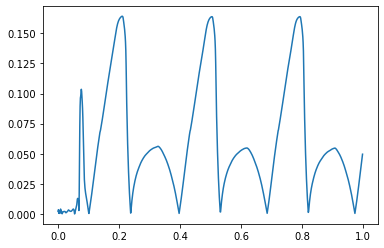

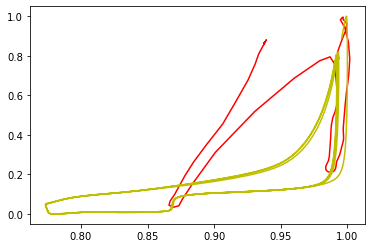

19


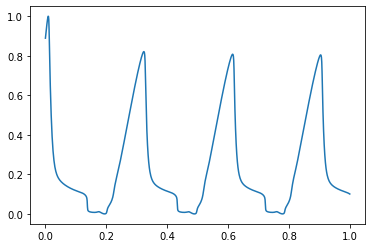

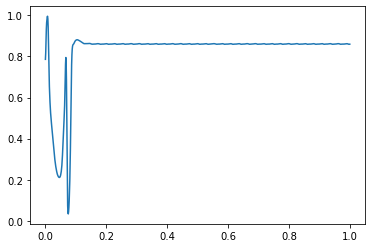

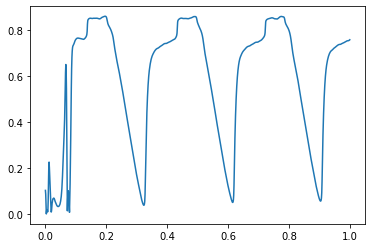

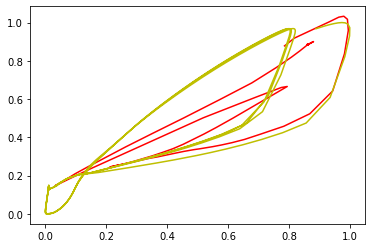

20


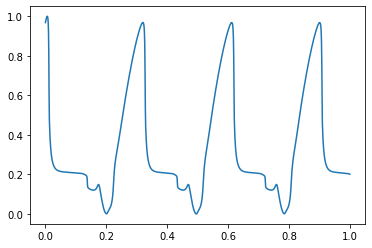

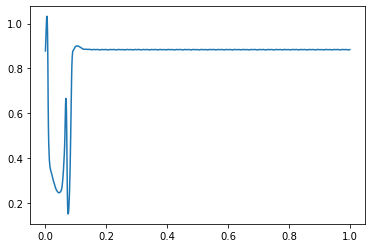

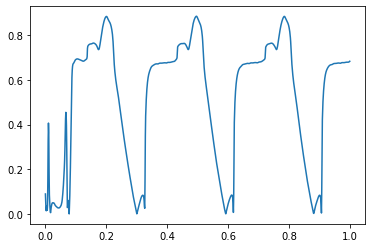

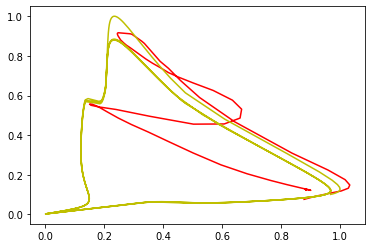

21


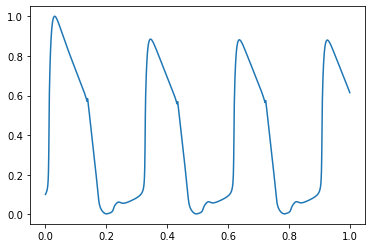

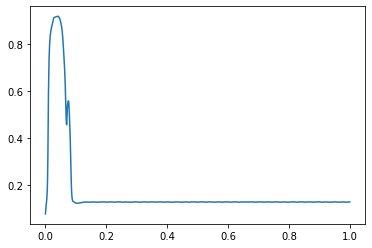

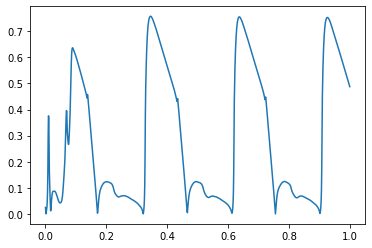

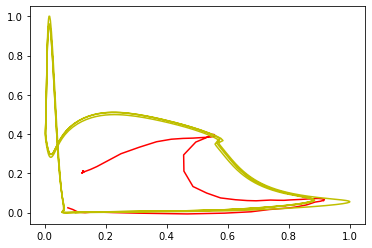

22


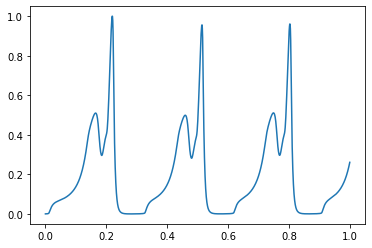

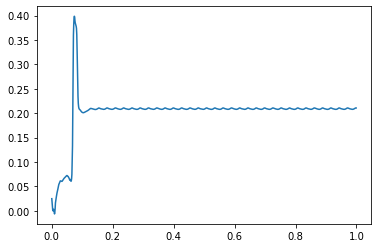

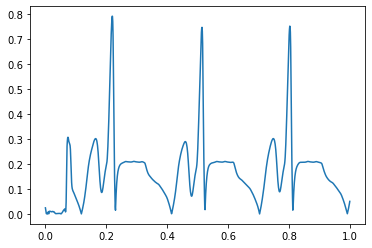

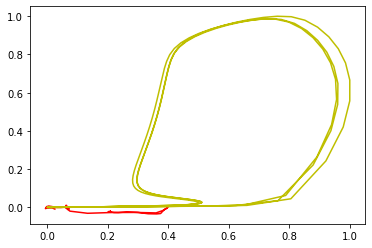

23


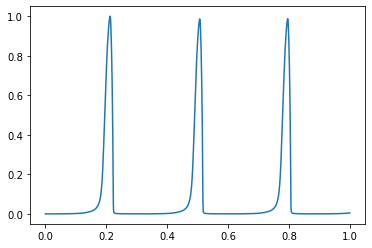

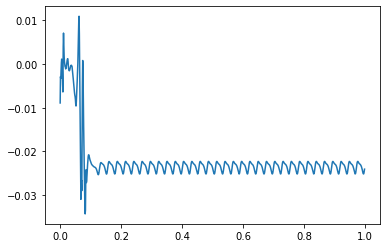

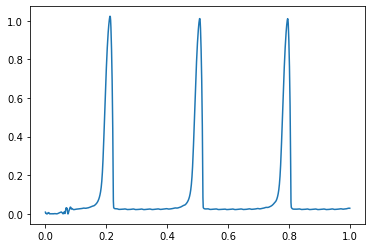

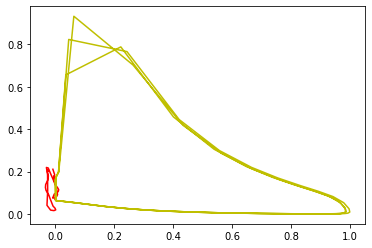

24


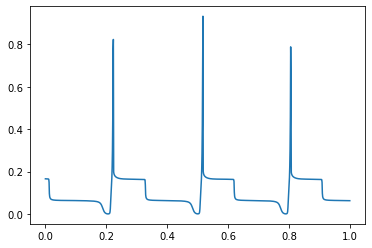

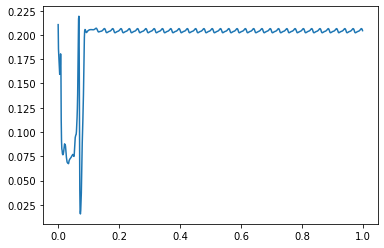

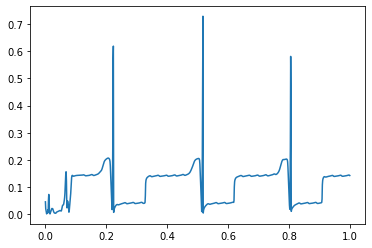

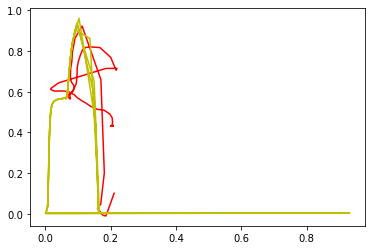

25


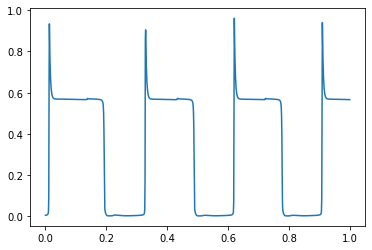

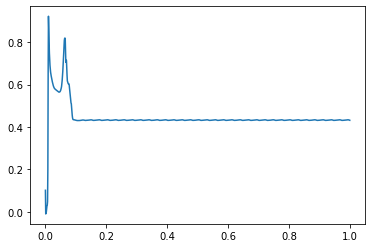

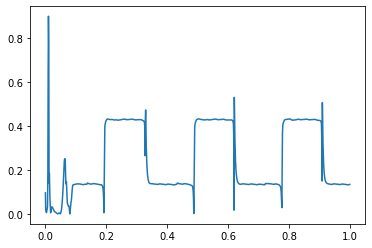

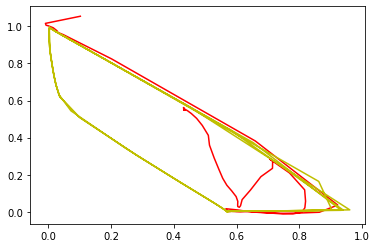

26


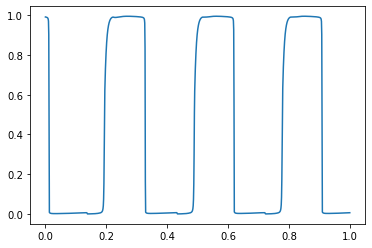

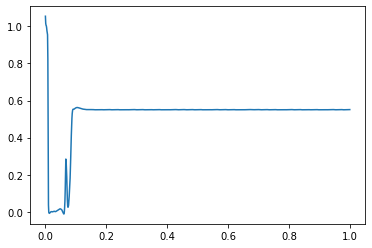

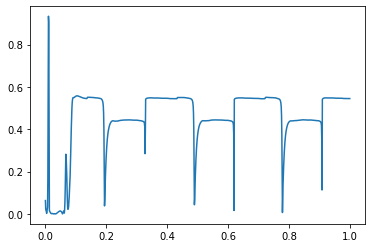

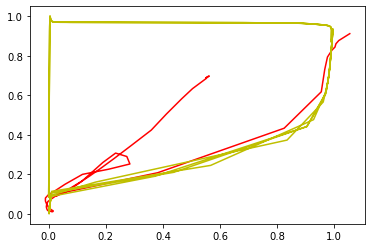

27


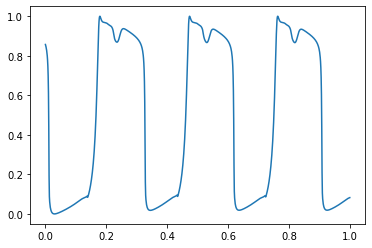

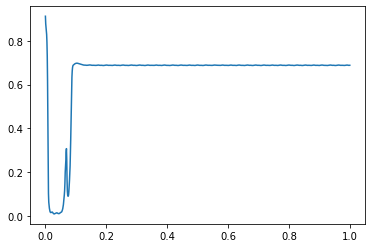

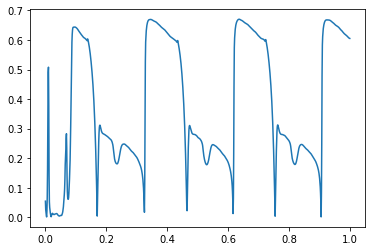

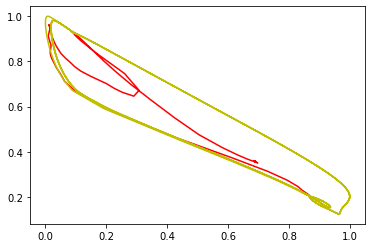

28


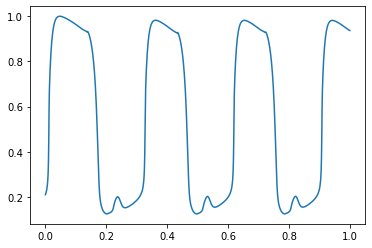

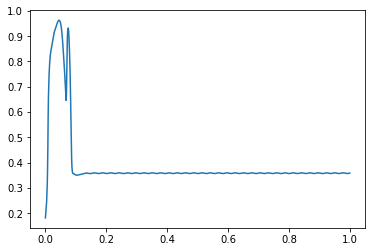

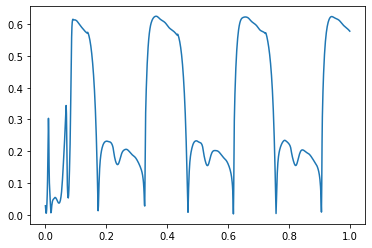

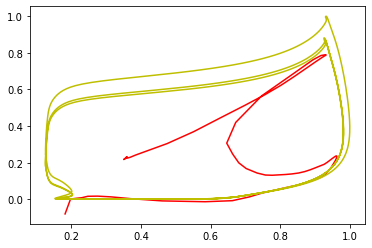

29


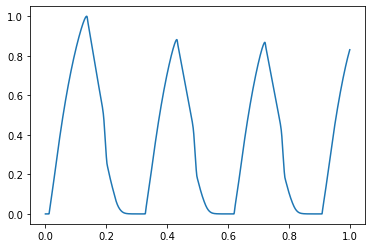

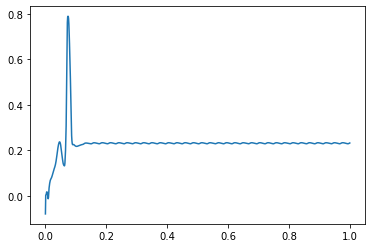

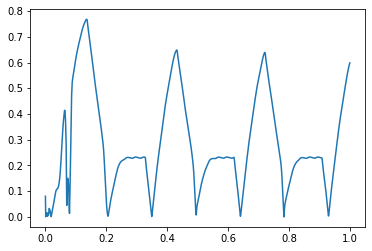

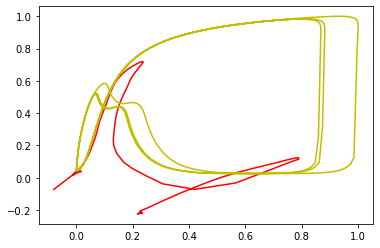

30


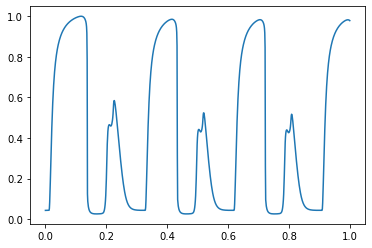

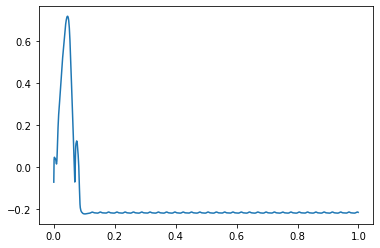

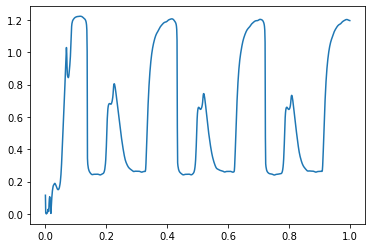

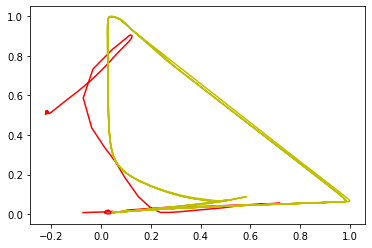

31


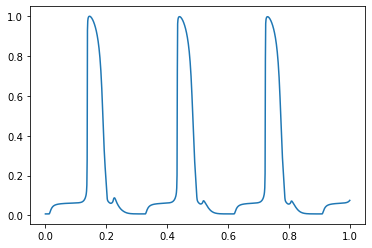

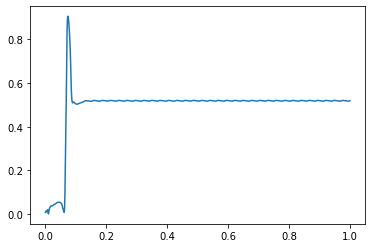

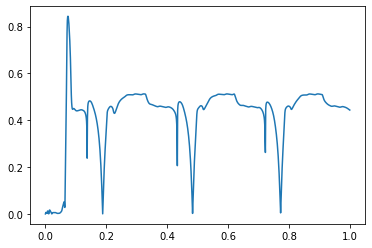

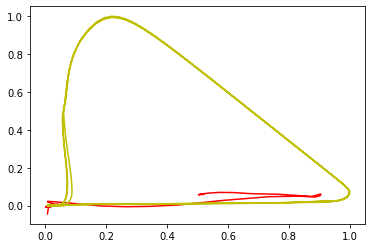

32


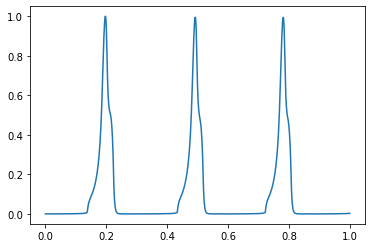

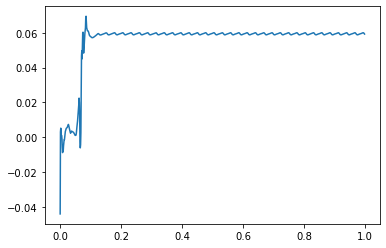

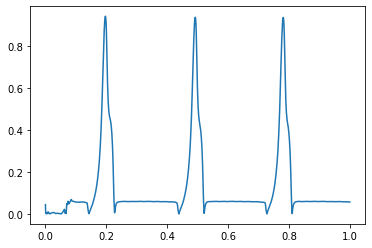

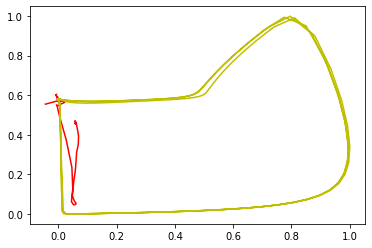

33


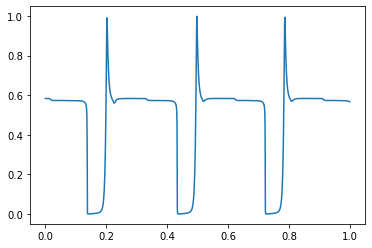

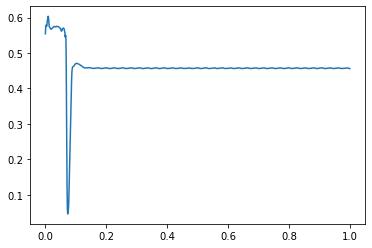

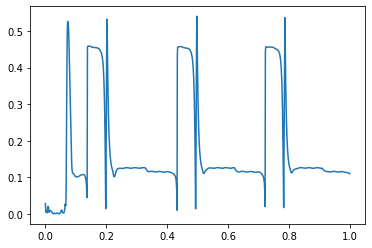

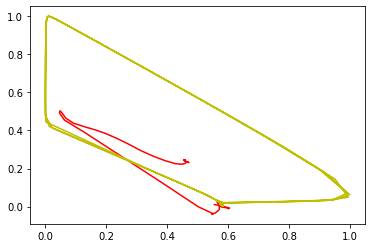

34


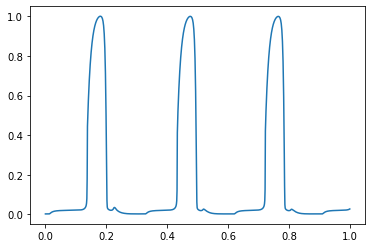

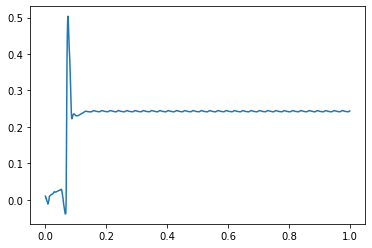

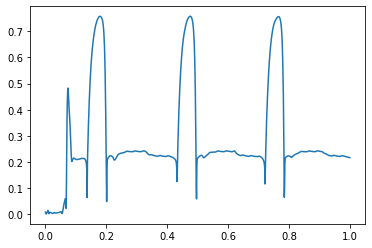

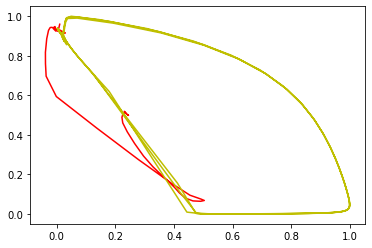

35


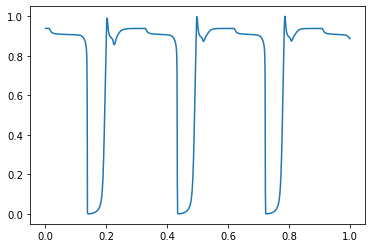

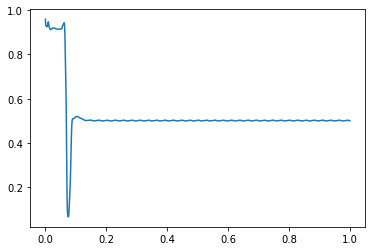

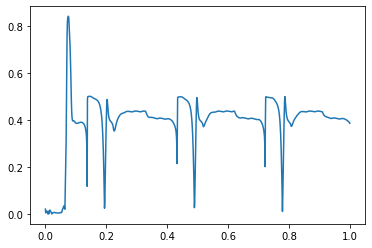

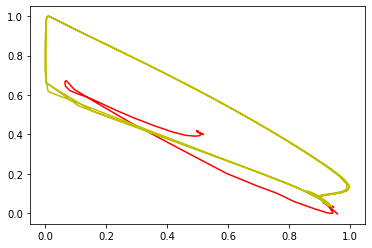

36


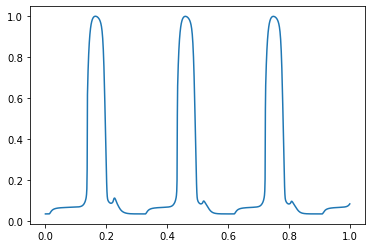

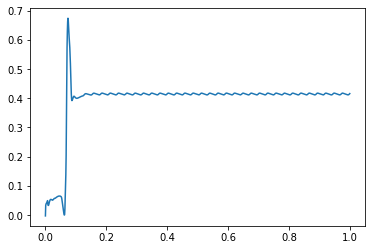

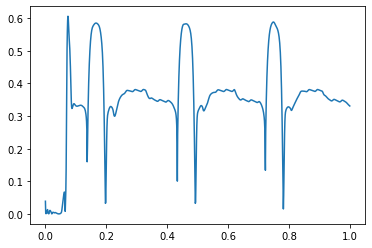

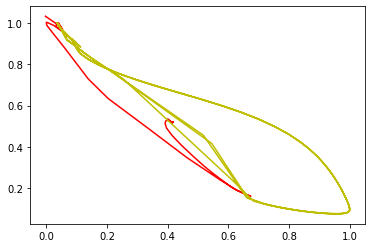

37


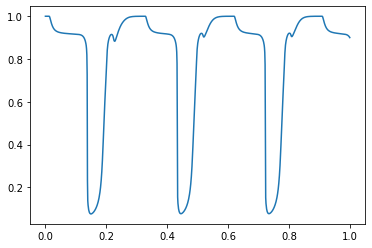

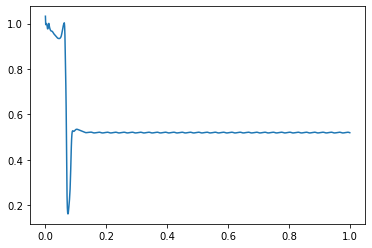

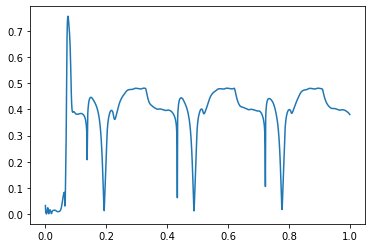

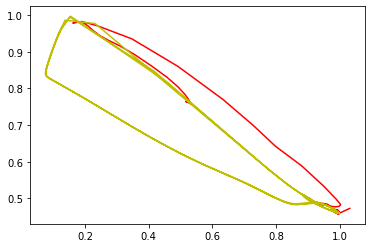

38


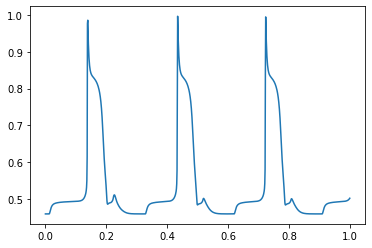

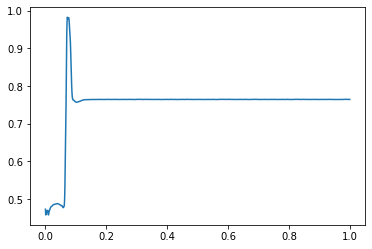

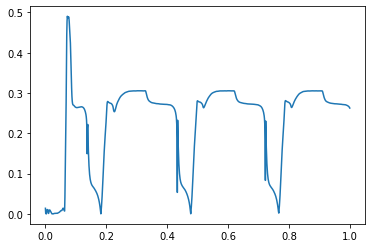

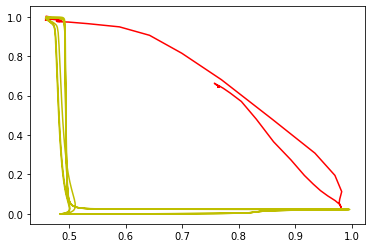

39


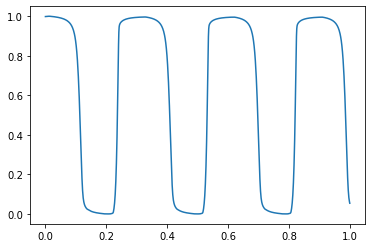

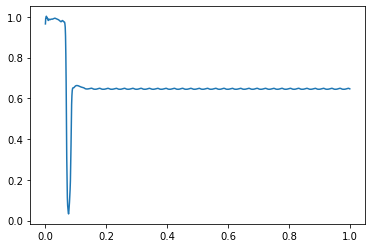

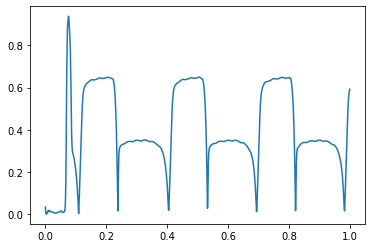

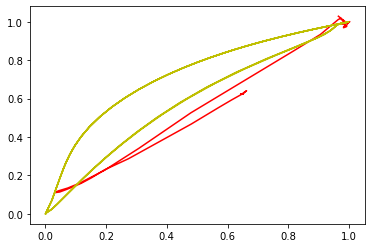

40


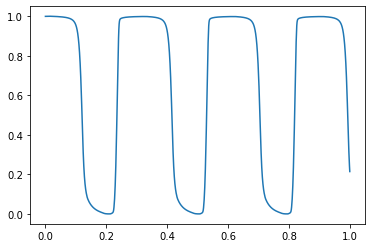

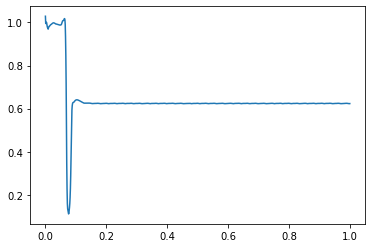

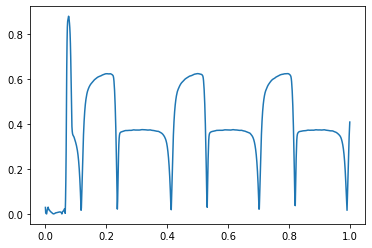

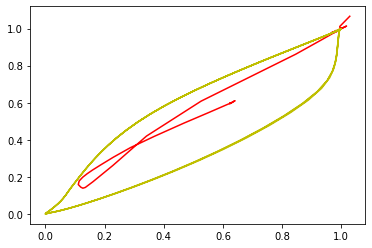

41


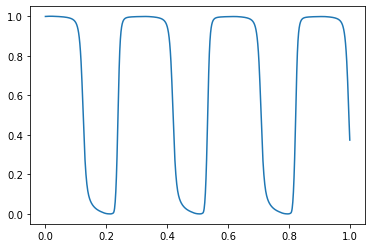

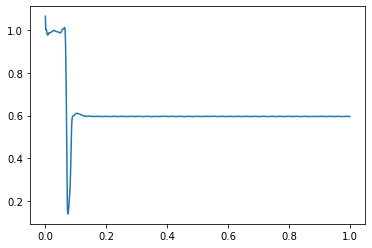

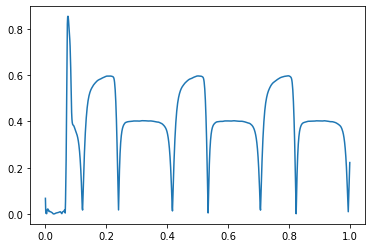

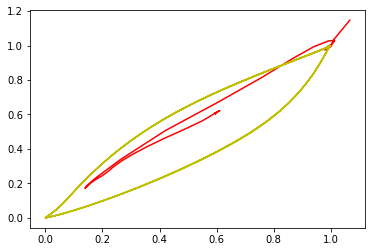

42


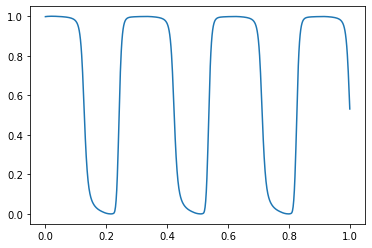

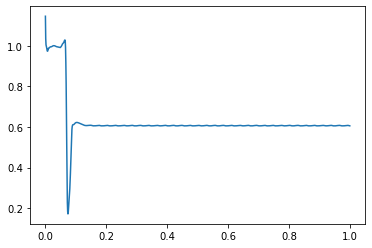

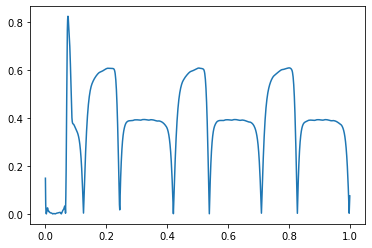

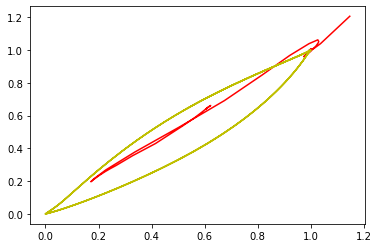

43


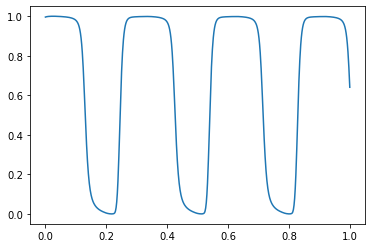

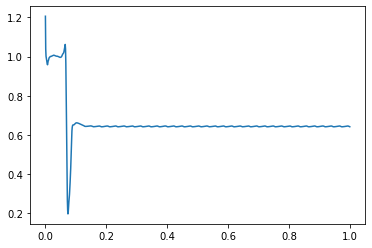

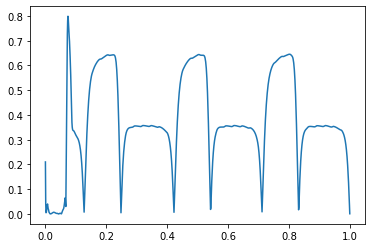

IndexError: index 44 is out of bounds for axis 0 with size 44

In [22]:
        for dim in range(44):
            print(dim)
            plt.plot(time[:len(time)], ori_data[200:200+len(time):1, dim])
            plt.show()
            plt.plot(time,[i[dim] for i in path_all])
            plt.show()
            plt.plot(time,[abs(ori_data[200+i,dim]-path_all[i][dim]) for i in range(len(path_all))])
            plt.show()
            plt.plot([i[dim] for i in path_all],[i[dim+1] for i in path_all],'r')
            plt.plot(ori_data[200:200+len(time):1, dim], ori_data[200:200+len(time):1, dim+1],'y')
            plt.show()

1000


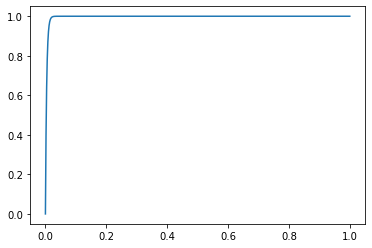

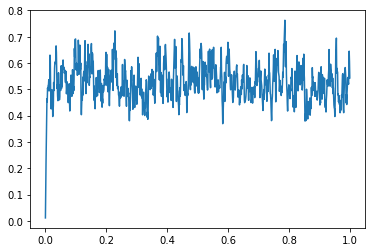

1000


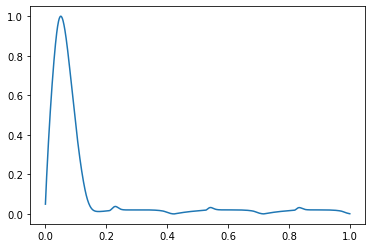

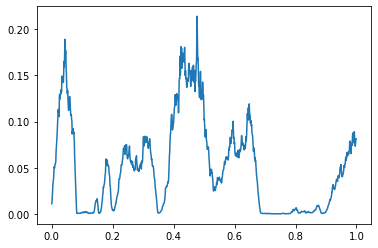

1000


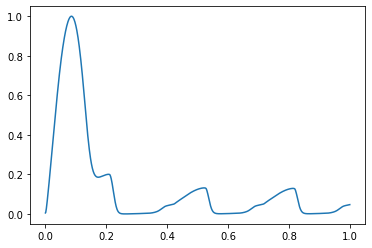

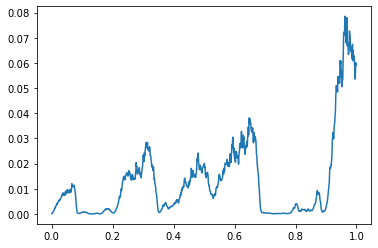

1000


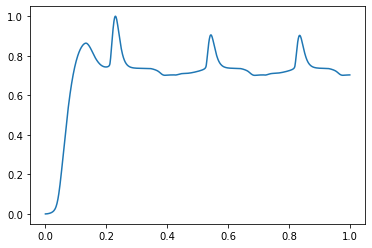

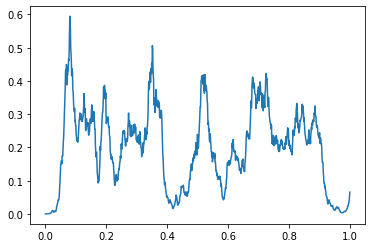

1000


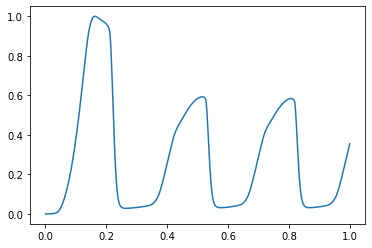

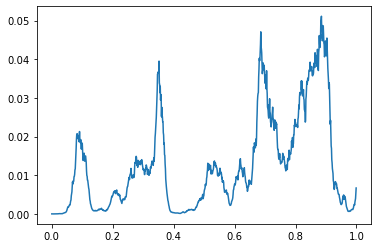

1000


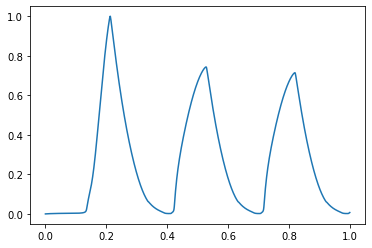

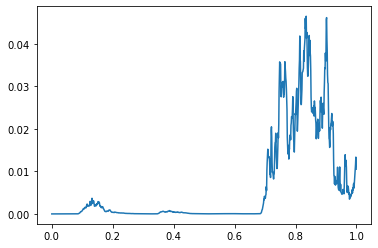

1000


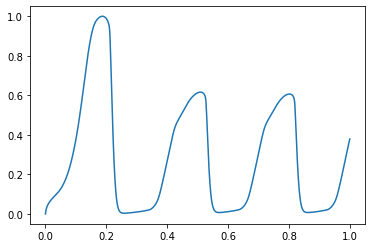

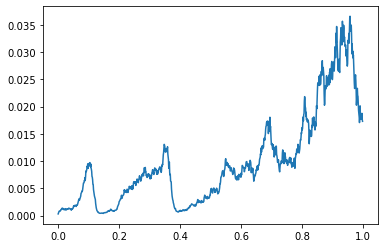

1000


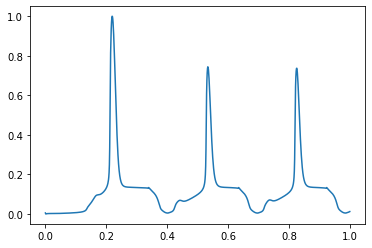

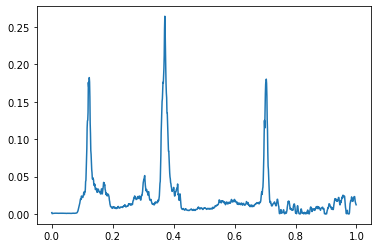

1000


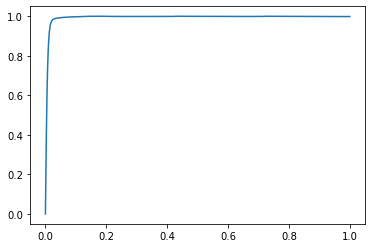

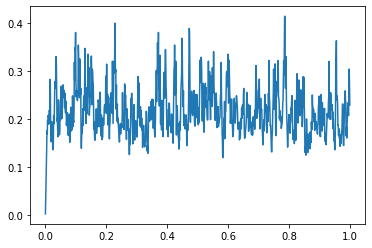

1000


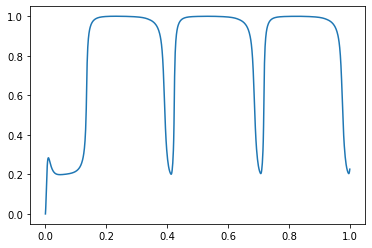

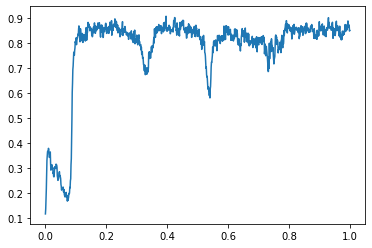

1000


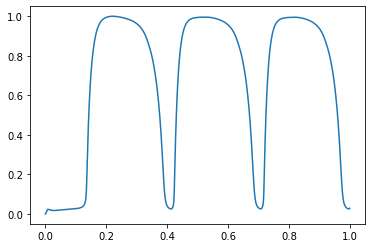

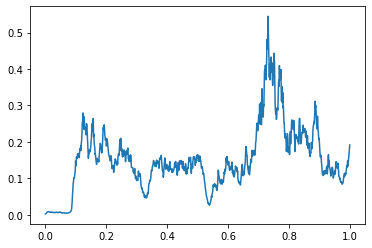

1000


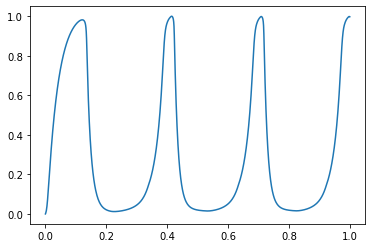

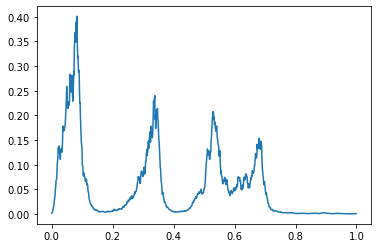

1000


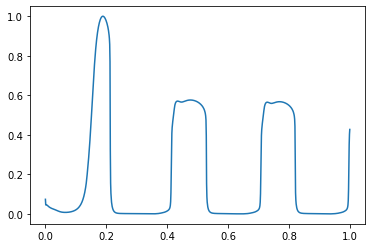

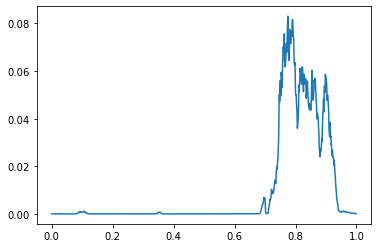

1000


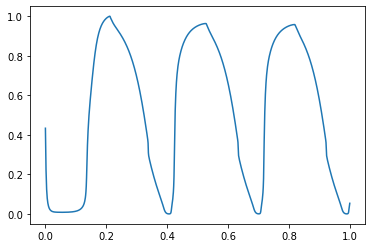

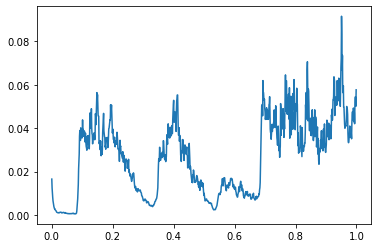

1000


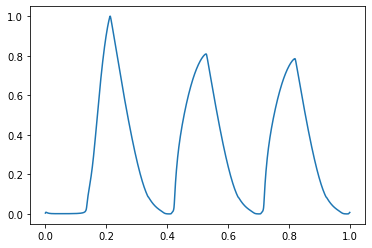

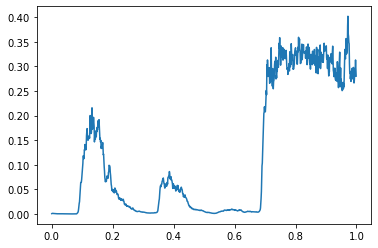

1000


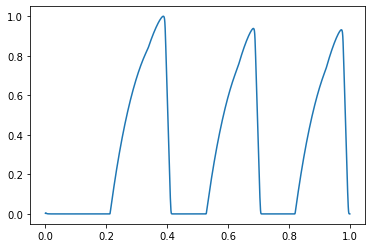

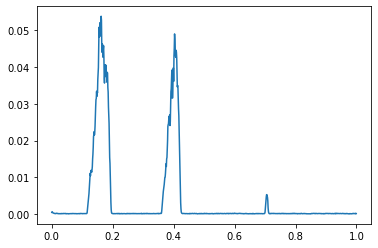

1000


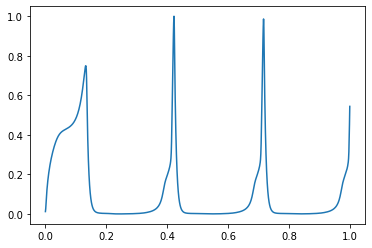

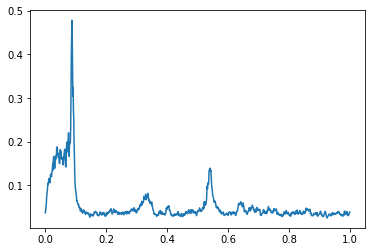

1000


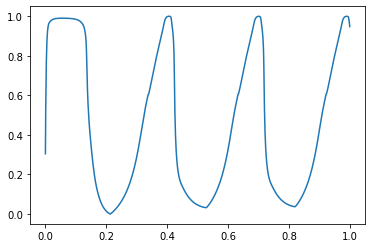

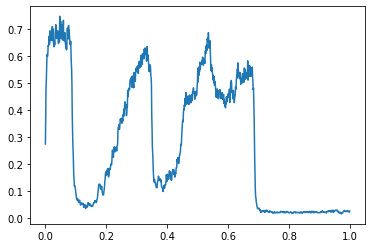

1000


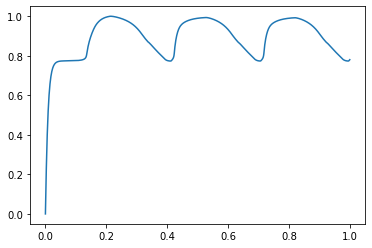

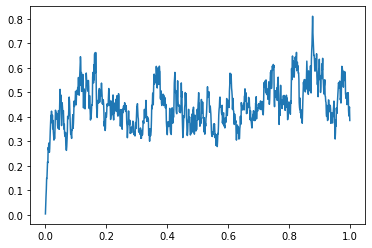

1000


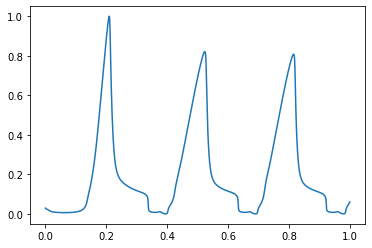

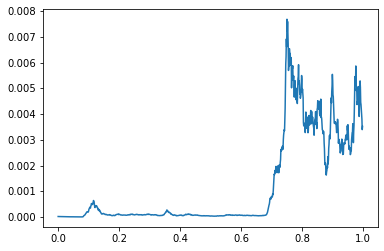

1000


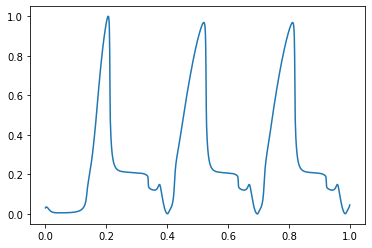

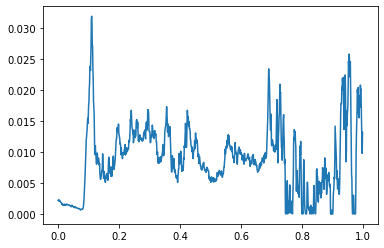

1000


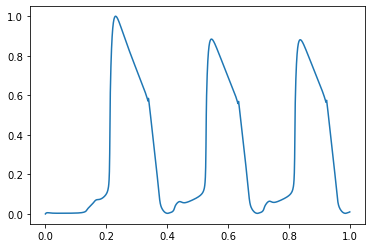

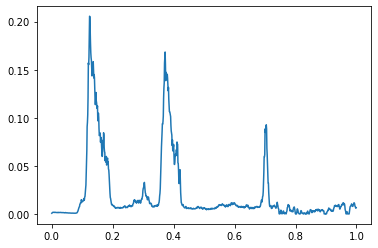

1000


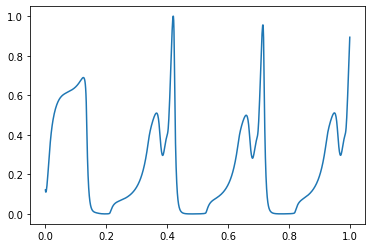

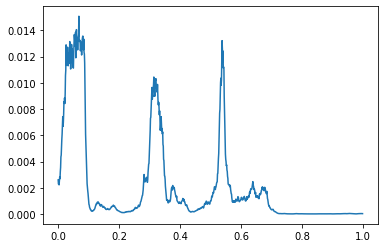

1000


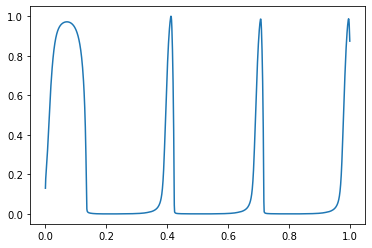

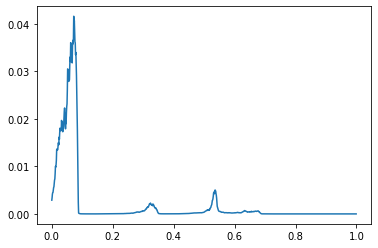

1000


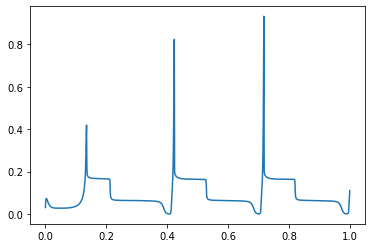

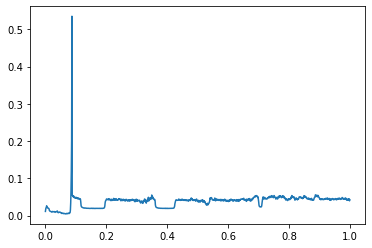

1000


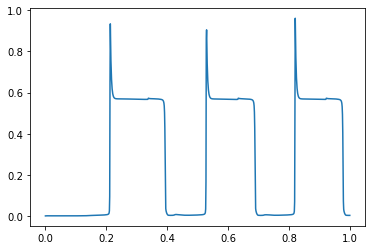

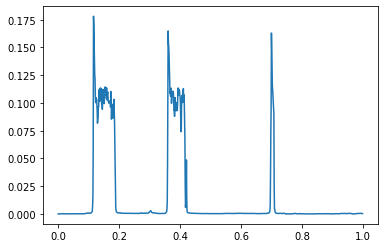

1000


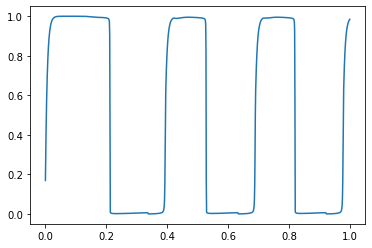

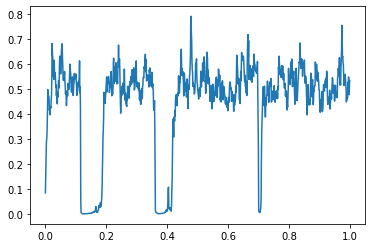

1000


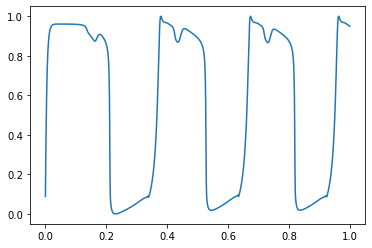

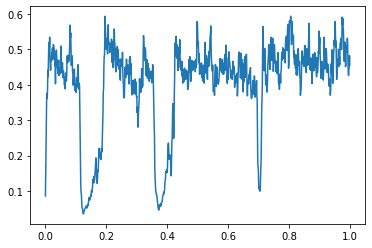

1000


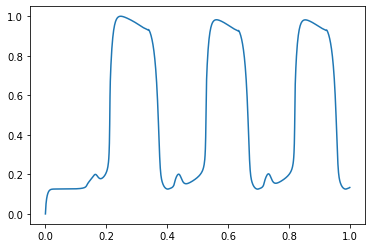

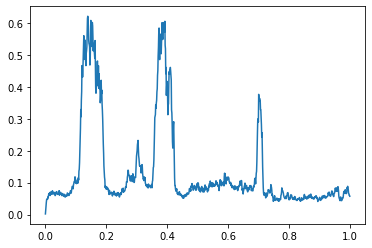

1000


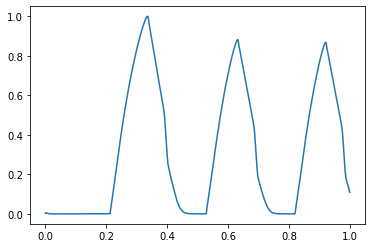

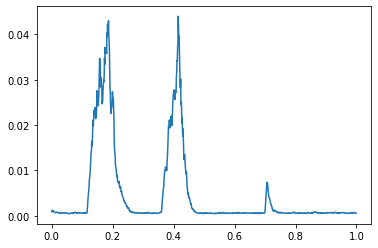

1000


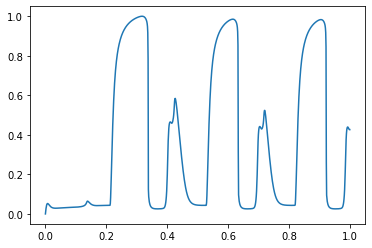

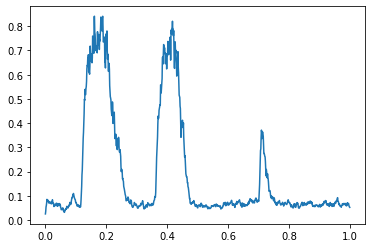

1000


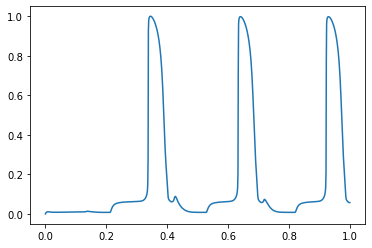

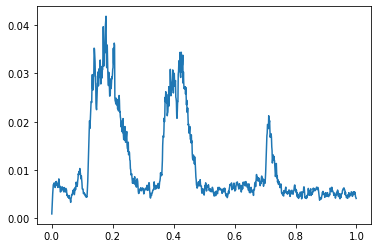

1000


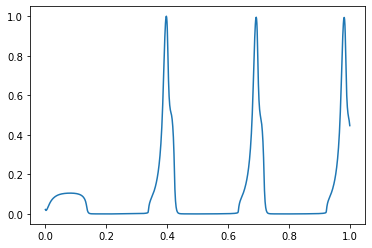

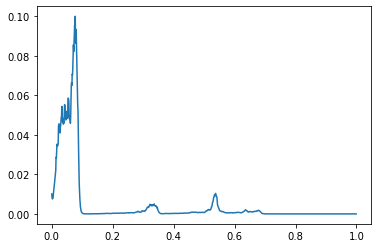

1000


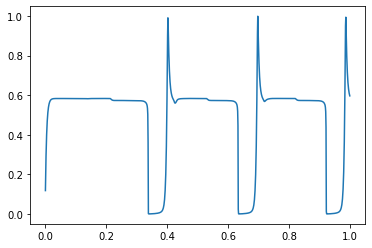

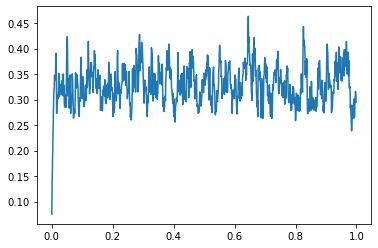

1000


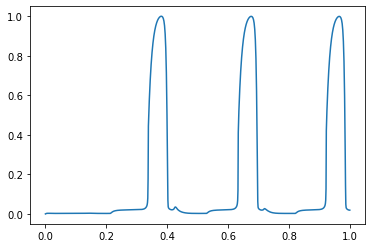

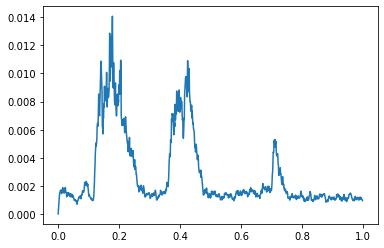

1000


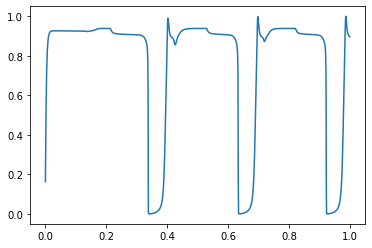

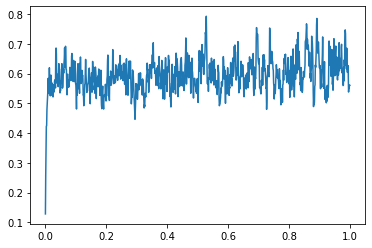

1000


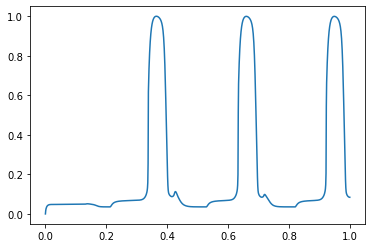

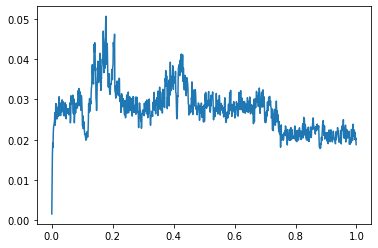

1000


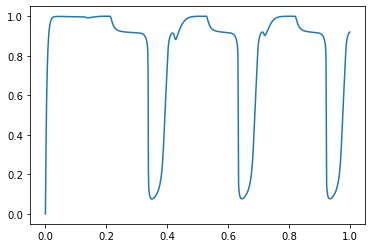

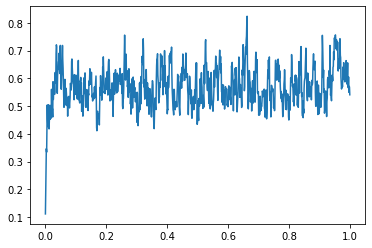

1000


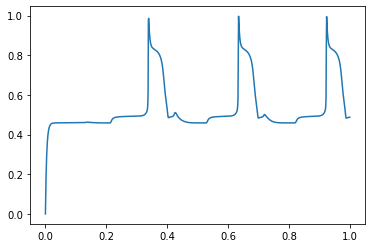

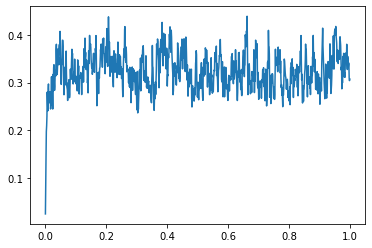

1000


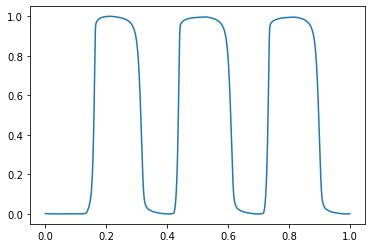

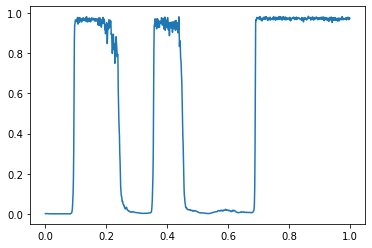

1000


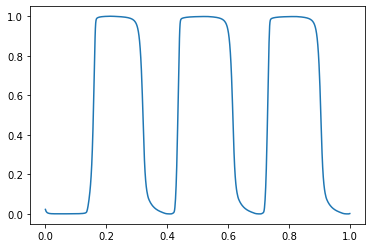

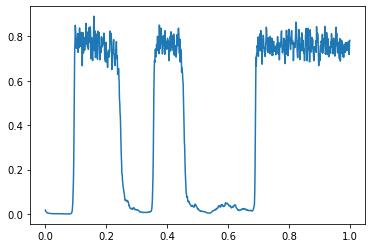

1000


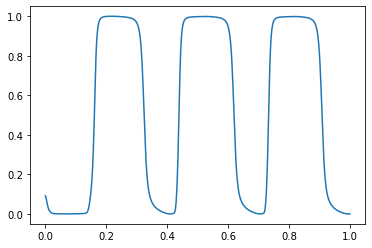

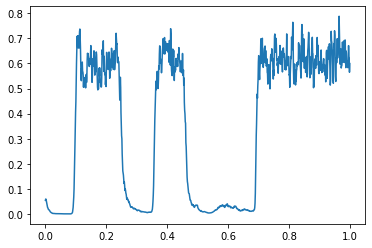

1000


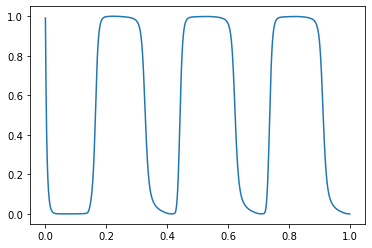

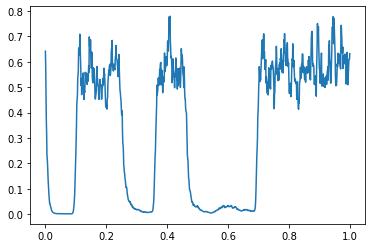

1000


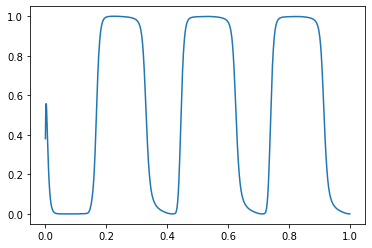

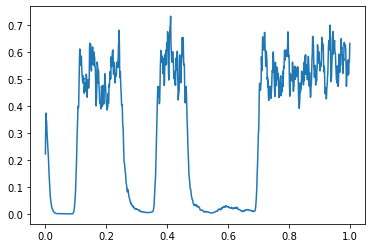

In [12]:
def plot_train(Dataset):
    for dim in range(Dataset.dim):
        time=Dataset.time[0:len(Dataset.time):gap].reshape(-1,1)
        print(len(time))
        train_data=Dataset.train_dl#transform_back(Dataset.train_dl,'train2back')
        ori_data=Dataset.ori_data#transform_back(Dataset.train_dl,'train2back')
        plt.plot(time, ori_data[:len(time), dim])
        plt.show()
        plt.plot(time, train_data[:len(time), dim])
        plt.show()
        
plot_train(DS)

In [8]:
from baseline.lcrnn_model import LCrnn,RNN
from Data_Utils import *
from Plot_Utils import *



def fftTransfer(timeseries, n=10, fmin=0):
    #print(len(timeseries))
    yf = abs(np.fft.fft(timeseries))#,axes=1))  # 取绝对值
    yfnormlize = yf / len(timeseries)  # 归一化处理
    #print('yfnormlize is',yfnormlize.shape)
    #conv1 = np.real(np.fft.ifftn(yf))
    #plt.plot(conv1 - 0.5)  # 为看清楚，将显示区域下拉0.5
    #plt.plot(yfnormlize - 1)
    #plt.show()
    yfhalf = yfnormlize[range(int(len(timeseries)/2))]  # 由于对称性，只取一半区间
    yfhalf = yfhalf * 2   # y 归一化
    xf = np.arange(len(timeseries))  # 频率
    xhalf = xf[range(int(len(timeseries) / 2))]  # 取一半区间
    x = np.arange(len(timeseries))  # x轴
    #plt.plot(x, timeseries)
    #plt.title('Original wave')
    #plt.plot(xhalf, yfhalf, 'r')
    #plt.title('FFT of Mixed wave(half side frequency range)', fontsize=10, color='#7A378B')  # 注意这里的颜色可以查询颜色代码表
    fwbest = yfhalf[signal.argrelextrema(yfhalf, np.greater)]
    xwbest = signal.argrelextrema(yfhalf, np.greater)
    #plt.plot(xwbest[0][:n], fwbest[:n], 'o', c='yellow')
    #plt.show(block=False)
    #plt.show()
    xorder = np.argsort(-fwbest)  # 对获取到的极值进行降序排序，也就是频率越接近，越排前
    #print('xorder = ', xorder)
    xworder = list()
    xworder.append(xwbest[x] for x in xorder)  # 返回频率从大到小的极值顺序
    fworder = list()
    fworder.append(fwbest[x] for x in xorder)  # 返回幅度
    if len(fwbest) <= n:
        fwbest = fwbest[fwbest >= fmin].copy()
        #print(fwbest)
        #print(len(timeseries)/xwbest[0][:len(fwbest)])
        return len(timeseries)/xwbest[0][:len(fwbest)], fwbest[:n]    #转化为周期输出
    else:
        fwbest = fwbest[fwbest >= fmin].copy()
        #print('len fwbest is',len(fwbest))
        #print('xwbest is also',xwbest)
        return len(timeseries)/xwbest[0][:n], fwbest[:n]  # 只返回前n个数   #转化为周期输出

def load_model(save_path):
    model = torch.load(save_path)
    return model

all_nt=[]
all_fshape=[]
for dim in range(44):
    nt,fshape=fftTransfer(DS.train_dl[:10000,dim],10,0)
    all_nt.append(nt.min())
    #print(nt.max())
    all_fshape.append(fshape)
print(len(all_fshape))
all_fshape=np.vstack(all_fshape)
print(len(all_nt))
all_nt=np.vstack(all_nt)
print('nt shape',all_nt.shape)
print(all_nt.max())
print('all_fshape',all_fshape.shape)
print(all_fshape.min())


44
44
nt shape (44, 1)
384.61538461538464
all_fshape (44, 10)
0.0004673944574358571
